In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/kaggle/input/wangwenkai40/CocaCola", validation_split=0.2, subset="training",
  seed=123, image_size=(1280, 960), batch_size=4)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/kaggle/input/wangwenkai40/CocaCola", validation_split=0.2, subset="validation",
  seed=123, image_size=(1280, 960), batch_size=4)
class_names = train_ds.class_names
print(class_names)
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 100 files belonging to 2 classes.
Using 80 files for training.


2022-03-31 02:31:00.255894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 02:31:00.373195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 02:31:00.374392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 02:31:00.379472: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 100 files belonging to 2 classes.
Using 20 files for validation.
['0_NO', '1_YES']


2022-03-31 02:31:03.370426: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


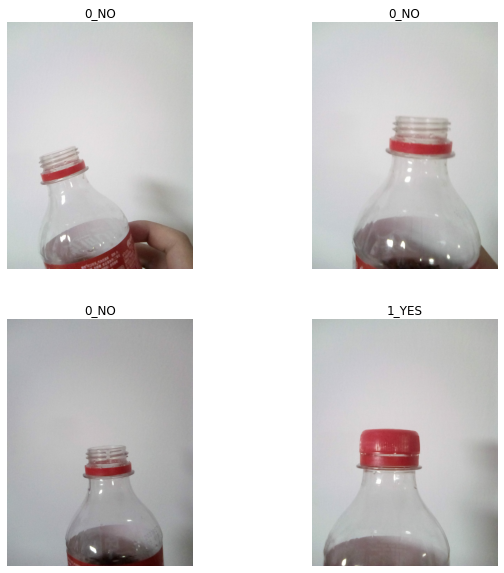

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(1280, 960, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-03-31 02:31:09.911761: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 11s 153ms/step - loss: 19.9720 - accuracy: 0.5000 - val_loss: 0.7111 - val_accuracy: 0.4000
Epoch 2/20
20/20 [==============================] - 2s 94ms/step - loss: 0.6997 - accuracy: 0.5250 - val_loss: 0.6835 - val_accuracy: 0.6000
Epoch 3/20
20/20 [==============================] - 2s 94ms/step - loss: 0.7030 - accuracy: 0.4750 - val_loss: 0.6933 - val_accuracy: 0.4000
Epoch 4/20
20/20 [==============================] - 2s 94ms/step - loss: 0.8909 - accuracy: 0.7000 - val_loss: 0.6749 - val_accuracy: 0.7500
Epoch 5/20
20/20 [==============================] - 2s 98ms/step - loss: 0.6944 - accuracy: 0.5250 - val_loss: 0.6956 - val_accuracy: 0.6000
Epoch 6/20
20/20 [==============================] - 2s 96ms/step - loss: 1.0362 - accuracy: 0.6375 - val_loss: 0.6771 - val_accuracy: 0.5500
Epoch 7/20
20/20 [==============================] - 2s 95ms/step - loss: 0.5431 - accuracy: 0.7500 - val_loss: 0.4677 - val_accuracy: 0.7500
Epoch 8/20
20/20 [===